In [1]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#cross validation 
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
# to import custom functions
import sys
import os
# Get the parent directory
parent_dir = os.path.dirname(os.getcwd()) 
# Add the parent directory to sys.path
sys.path.append(parent_dir)
# import our custom metrics function and our custom scorer (Cohen's Kappa)
from custom_functions import our_metrics, get_kappa, comb_metrics
%config Completer.use_jedi = False
pd.set_option('display.max_rows', None)
from sklearn import metrics

from sklearn.naive_bayes import CategoricalNB

In [2]:
# reading all the csv files 
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv')
X_test = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_dropped_first.csv')
X_train = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_dropped_first.csv')

In [3]:
clf = CategoricalNB(force_alpha=True)

clf.fit(X_train, np.ravel(y_train))

CategoricalNB(force_alpha=True)

In [4]:
y_pred= clf.predict(X_test)

In [5]:
y_pred.shape

(2892,)

In [6]:
clf.predict_proba(X_test)

array([[0.31783409, 0.29201933, 0.17112704, 0.21901954],
       [0.19449796, 0.34303421, 0.25628969, 0.20617814],
       [0.29053394, 0.37125787, 0.17794544, 0.16026275],
       ...,
       [0.22182329, 0.36130538, 0.23472653, 0.18214481],
       [0.41164125, 0.29770834, 0.12454745, 0.16610296],
       [0.1786644 , 0.29730021, 0.25515465, 0.26888074]])

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3468
_____________________
Weighted Quadratic Kappa: 0.2292


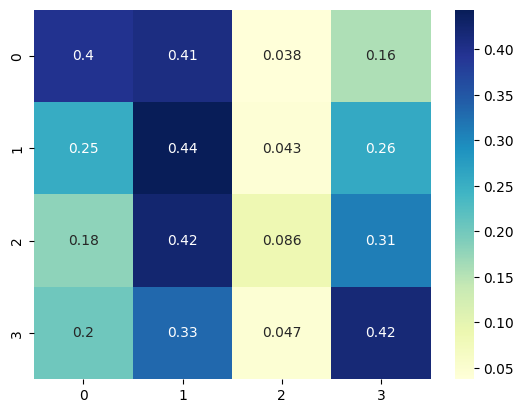

In [7]:
our_metrics(y_test, y_pred)

### For Dogs dataset

In [10]:
# import the csv files
y_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_dogs.csv')
y_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_dogs.csv')

X_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_dogs_dropped.csv')
X_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_dogs_dropped.csv')

In [11]:
#dogs
clf.fit(X_train_dogs, np.ravel(y_train_dogs))

CategoricalNB(force_alpha=True)

In [12]:
y_pred_dogs = clf.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3388
_____________________
Weighted Quadratic Kappa: 0.2133


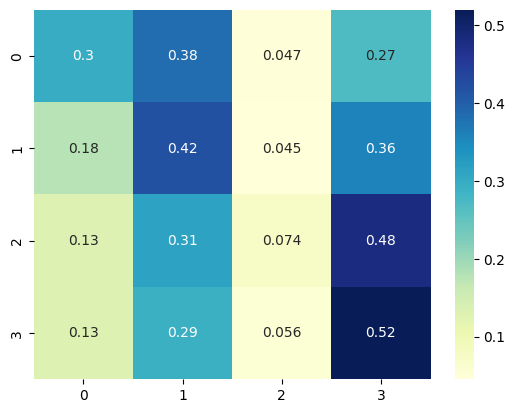

In [13]:
our_metrics(y_test_dogs, y_pred_dogs)

### For cats dataset

In [14]:
# import the csv files

y_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_cats.csv')
y_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_cats.csv')

X_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_cats_dropped.csv')
X_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_cats_dropped.csv')

In [15]:
clf.fit(X_train_cats, np.ravel(y_train_cats))

CategoricalNB(force_alpha=True)

In [16]:
y_pred_cats = clf.predict(X_test_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3689
_____________________
Weighted Quadratic Kappa: 0.1976


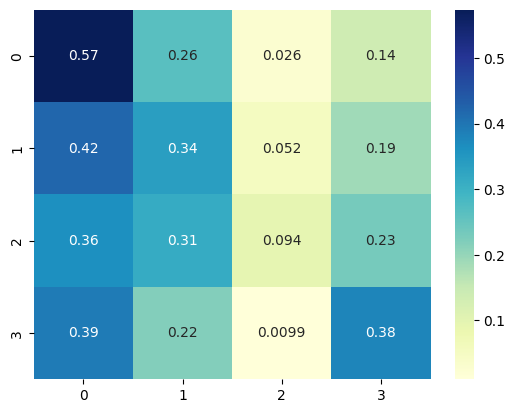

In [17]:
our_metrics(y_test_cats, y_pred_cats)

0.37863070539419086
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3786
_____________________
Weighted Quadratic Kappa: 0.2679


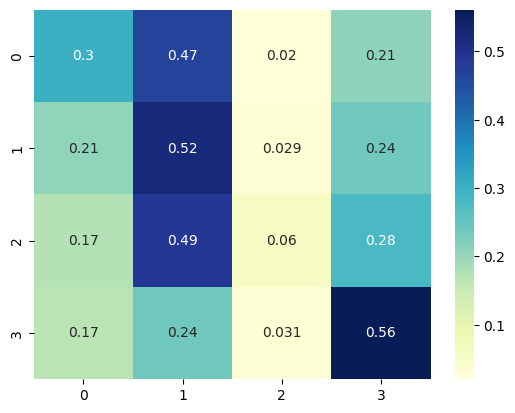

In [18]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, np.ravel(y_train))
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy) 
# creating a confusion matrix
our_metrics(y_test, svm_predictions)


0.2800829875518672
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.2801
_____________________
Weighted Quadratic Kappa: 0.0417


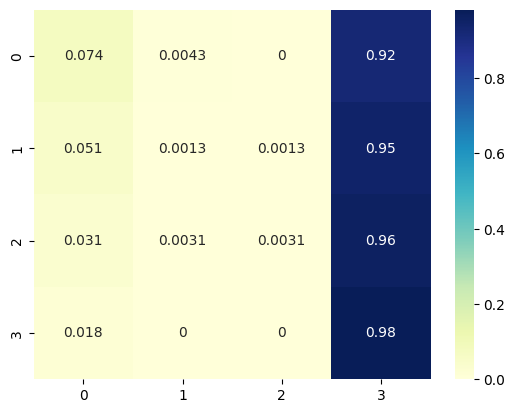

In [19]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, np.ravel(y_train))
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print (accuracy)
  
# creating a confusion matrix
our_metrics(y_test, gnb_predictions)